## 1. Install Dependencies and Setup 

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                           Version
--------------------------------- ---------------
absl-py                           2.1.0
aiobotocore                       2.5.0
aiofiles                          22.1.0
aiohttp                           3.8.5
aioitertools                      0.7.1
aiosignal                         1.2.0
aiosqlite                         0.18.0
alabaster                         0.7.12
anaconda-anon-usage               0.4.2
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.1
anaconda-cloud-auth               0.1.3
anaconda-navigator                2.5.3
anaconda-project                  0.11.1
anyio                             3.5.0
appdirs                           1.4.4
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.1
asttokens                         2.0.5
astunparse            

In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    '''
    ->Enables memory growth for the GPU.
    ->This ensures TensorFlow allocates memory on the GPU dynamically, as needed, instead of pre-allocating
    all available memory at once (which is the default behavior).
    Why?
    ->Prevents Memory Errors:
    By default, TensorFlow allocates all GPU memory, even if your model doesn't need it, which can cause conflicts
    if other processes or notebooks share the GPU.
    Enabling memory growth avoids this by using only the memory your process requires.
    Better Resource Sharing:
    ->It makes sharing GPUs with other processes or users (especially on shared machines or platforms like Colab) smoother.

    '''


In [5]:
tf.config.experimental.list_physical_devices('GPU')

[]

## 2. Remove Dodgy Images 

In [6]:
import cv2
# import imghdr : this module is used to identify the type of image file based on it's content
from PIL import Image
# Pillow is a modernized and actively maintained fork of the Python Imaging Library (PIL), which adds support
# for opening, manipulating, and saving many image file formats.

In [7]:
data_dir = 'data_img'

In [8]:
image_exts = ['jpg', 'jpeg', 'png', 'bmp']

In [9]:
import os

# prints out all the directories and files it encounters.
data_dir = "data_img"
for root, dirs, files in os.walk(data_dir): 
    #os.walk() function generates the file names in a directory tree by walking through it either top-down or bottom-up.
    print(f"Directory: {root}")
    for file in files:
        print(f"File: {file}")


Directory: data_img
Directory: data_img\happy
File: Training_10019449.jpg
File: Training_10046809.jpg
File: Training_10066226.jpg
File: Training_10070997.jpg
File: Training_10080933.jpg
File: Training_10109375.jpg
File: Training_10116721.jpg
File: Training_10127474.jpg
File: Training_10133389.jpg
File: Training_10139297.jpg
File: Training_10142161.jpg
File: Training_10142426.jpg
File: Training_10181727.jpg
File: Training_1018317.jpg
File: Training_10199847.jpg
File: Training_10209551.jpg
File: Training_10220224.jpg
File: Training_10229138.jpg
File: Training_10230185.jpg
File: Training_10239785.jpg
File: Training_10240470.jpg
File: Training_10242543.jpg
File: Training_10246389.jpg
File: Training_10248095.jpg
File: Training_10257744.jpg
File: Training_10265501.jpg
File: Training_1027250.jpg
File: Training_10288829.jpg
File: Training_10290756.jpg
File: Training_10313464.jpg
File: Training_10348116.jpg
File: Training_10361011.jpg
File: Training_10367793.jpg
File: Training_10391066.jpg
File

In [10]:
# os.listdir is a function in Python's os module that retrieves the list of files and directories in a given directory.
'''
->os.path.join is a function used to combine multiple path components into a single path.
->It ensures the correct file path format for the operating system (e.g., using / for Linux/Mac and \ for Windows).
->full_path = os.path.join(folder, subfolder, file_name)
'''

# class_name represents each item in data_dir (e.g., happy, sad, angry).
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
#   Ensures the item is a directory and not a file. If it's not a directory, it skips to the next iteration.
    if os.path.isdir(class_path):
        print(f"Class {class_name} has {len(os.listdir(class_path))} images.")


Class happy has 1034 images.
Class sad has 1051 images.


In [11]:
# Iterate over image classes and images
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_path):
        continue  # Skip non-directory files
    for image in os.listdir(class_path):
        image_path = os.path.normpath(os.path.join(class_path, image))
        # Normalize the path: Normalizing a path means converting it into a standard or consistent format, ensuring
        # it works across different systems and eliminates any redundant or unnecessary components.
        try:
            # Validate the image using PIL
            with Image.open(image_path) as img:
                img.verify()  # Verify the image file integrity
            # Check if the extension matches the allowed list
            ext = image.split('.')[-1].lower()
            if ext not in image_exts:
                print(f"Image not in ext list: {image_path}")
                if os.path.exists(image_path):
                    os.remove(image_path)
        except Exception as e:
            print(f"Issue with image: {image_path}, Error: {str(e)}")
            if os.path.exists(image_path):
                os.remove(image_path)  # Remove corrupted or invalid images


## 3. Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data_img')

Found 2085 files belonging to 2 classes.


The line "data = tf.keras.utils.image_dataset_from_directory('data_img')" is used to load images from a directory into a tf.data.Dataset object, which can be used for training a machine learning model in TensorFlow.

1. tf.keras.utils.image_dataset_from_directory()
->This is a utility function in TensorFlow that allows you to easily load and organize images for training a model.
->It automatically labels the images based on the folder structure and splits them into batches for efficient training.
2. Returned Object:
->The function returns a tf.data.Dataset object, which is an efficient data structure for handling large datasets.
->This dataset object contains batches of images and their corresponding labels.

In [14]:
data_iterator = data.as_numpy_iterator()
# Converts the TensorFlow dataset (data) into a NumPy iterator. This allows you to access batches of data as NumPy arrays.
batch = data_iterator.next()
# Gets the next batch of images and labels from the dataset.batch[0] contains the images, and batch[1] contains the 
# corresponding labels.

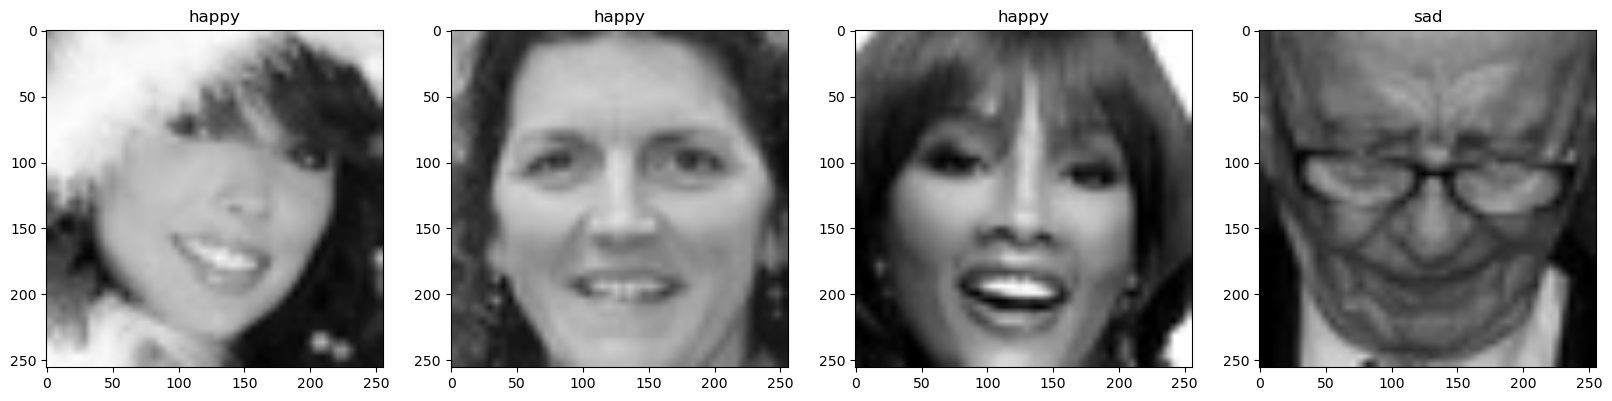

In [15]:
class_names = ['happy', 'sad']
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(class_names[batch[1][idx]])
    

Here:
->fig is the entire plot.
->ax is a list (or array) of 4 subplot axes (because ncols=4), and each subplot can hold one image.
Why two variables?
fig controls the overall appearance (size, title, etc.) of the plot, while ax is where you draw or plot data.
In the case of ax[idx], you're specifying which subplot (or axis) to plot into.


Key Components:
1. batch[0] and batch[1]:

batch[0] contains the images from the batch.
batch[1] contains the labels corresponding to those images.
In TensorFlow's image_dataset_from_directory, the dataset object (like data) returns a tuple when iterated:

The first part of the tuple (batch[0]) is the actual image data.
The second part of the tuple (batch[1]) is the label data (the corresponding class for each image).
So, when you get a batch from the iterator, it contains two things: images and labels.

2. batch[0][:4]:

batch[0] is the array of images in the batch.
[:4] is slicing that array to only get the first 4 images in the batch (assuming the batch size is at least 4).
So batch[0][:4] is essentially a list of the first 4 images in the batch.

3. enumerate(batch[0][:4]):

enumerate() is a Python function that iterates through a sequence (in this case, the first 4 images from the batch) and provides two things for each iteration:
idx: The index (position) of the image in the batch. It's used to track which image in the sequence you're currently on.
img: The image itself at that position in the batch.
So, for each iteration:

idx will be 0 for the first image, 1 for the second, and so on.
img will be the actual image data (a NumPy array representing the image).

4. ax[idx].imshow(img.astype(int)):
ax[idx] is accessing the subplot axis (the individual subplot in the figure where the image will be displayed).
imshow(img.astype(int)) is displaying the image in the subplot. astype(int) ensures the image data is in an integer format (since sometimes image data might be in floating-point format, and this converts it to integer).
This displays each image in one of the 4 subplots.

5. ax[idx].title.set_text(batch[1][idx]):

batch[1][idx] gives you the label for the image at the current index idx. For example, if the label for the first image is "happy", this line sets the title of the subplot to "happy".

## 4. Scale Data

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.1764706 , 0.1764706 , 0.1764706 ],
          [0.1764706 , 0.1764706 , 0.1764706 ],
          [0.1764706 , 0.1764706 , 0.1764706 ],
          ...,
          [0.10196079, 0.10196079, 0.10196079],
          [0.10196079, 0.10196079, 0.10196079],
          [0.10196079, 0.10196079, 0.10196079]],
 
         [[0.1764706 , 0.1764706 , 0.1764706 ],
          [0.1764706 , 0.1764706 , 0.1764706 ],
          [0.1764706 , 0.1764706 , 0.1764706 ],
          ...,
          [0.10196079, 0.10196079, 0.10196079],
          [0.10196079, 0.10196079, 0.10196079],
          [0.10196079, 0.10196079, 0.10196079]],
 
         [[0.1764706 , 0.1764706 , 0.1764706 ],
          [0.1764706 , 0.1764706 , 0.1764706 ],
          [0.1764706 , 0.1764706 , 0.1764706 ],
          ...,
          [0.10196079, 0.10196079, 0.10196079],
          [0.10196079, 0.10196079, 0.10196079],
          [0.10196079, 0.10196079, 0.10196079]],
 
         ...,
 
         [[0.44705883, 0.44705883, 0.44705883],
          [0.44705

In [18]:
len(data)

66



### `data = data.map(lambda x, y: (x / 255, y))`
- **`data.map()`**: This applies a function to every element in the dataset `data`. Here, `data` is a TensorFlow dataset, and `.map()` applies the lambda function to each data element (a pair of images and labels).
- **`lambda x, y: (x / 255, y)`**: The lambda function takes two inputs, `x` and `y`, where:
  - `x` represents the images.
  - `y` represents the labels.
- **`x / 255`**: This scales the pixel values of the images from the range [0, 255] to the range [0, 1]. This is a common preprocessing step to normalize image data.

After this operation, every image in the dataset is divided by 255, normalizing it, while the labels (`y`) remain unchanged.

### `data.as_numpy_iterator().next()`
- **`as_numpy_iterator()`**: This converts the dataset into a NumPy iterator, which allows you to iterate through the dataset and get the data as NumPy arrays (instead of TensorFlow tensors).
- **`next()`**: This retrieves the next element from the iterator, which will be the next batch of images and their corresponding labels.

In short, this code normalizes the images in the dataset and retrieves the first batch of images and labels as NumPy arrays.

## 5. Split Data

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size

46

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 6. Build Deep Learning Model

In [22]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

### Why Use the Sequential Model in Keras?

The **Sequential model** is a linear stack of layers, where you can simply add layers one after another. It's ideal when you have a model where each layer has a single input and a single output (i.e., a linear flow). The `Sequential` model is straightforward and easy to use for most basic deep learning tasks, especially if you're building a simple neural network.

However, for more complex architectures—like those involving multiple inputs or outputs, shared layers, or non-linear connections—other models like the **Functional API** (which allows more flexibility) or **Subclassing** might be better choices.

### Explanation of the Imported Terms:

1. **Conv2D**:
   - **Purpose**: A 2D convolutional layer, used for processing image data.
   - **Explanation**: It performs a convolution operation on the input image to extract features like edges, textures, or patterns. This is crucial for computer vision tasks.
   - **Use case**: Commonly used in convolutional neural networks (CNNs) for tasks like image classification, object detection, etc.

2. **MaxPooling2D**:
   - **Purpose**: A 2D max pooling layer, used to reduce the spatial dimensions (height and width) of the image.
   - **Explanation**: Max pooling reduces the image size by selecting the maximum value from a pool of values in a given region. This helps in reducing computational complexity, preventing overfitting, and extracting dominant features.
   - **Use case**: Typically used after convolutional layers to downsample the feature maps.

3. **Dense**:
   - **Purpose**: A fully connected (dense) layer.
   - **Explanation**: In a dense layer, every input neuron is connected to every output neuron. It helps in learning complex patterns and is usually found in the final layers of a neural network for tasks like classification.
   - **Use case**: Used for classification, regression, or decision-making tasks, typically at the end of the network.

4. **Flatten**:
   - **Purpose**: Converts the multi-dimensional input into a 1D array.
   - **Explanation**: After convolution and pooling layers, the feature maps are multi-dimensional. Flattening reshapes them into a 1D array, so it can be passed into dense layers for further processing.
   - **Use case**: Used before the dense layers to reshape the data.

5. **Dropout**:
   - **Purpose**: A regularization technique used to prevent overfitting.
   - **Explanation**: Dropout randomly sets a fraction of input units to 0 at each update during training time, which helps to prevent the model from becoming too reliant on specific neurons. This forces the model to generalize better.
   - **Use case**: Applied during training to improve generalization and reduce overfitting.

In summary:
- **Sequential model** is used for simple, linear architectures.
- **Conv2D** extracts features from images.
- **MaxPooling2D** reduces spatial size of features.
- **Dense** connects all neurons in the layer.
- **Flatten** reshapes the data for dense layers.
- **Dropout** prevents overfitting by deactivating some neurons randomly during training.

In [24]:
model = Sequential()

# Convolutional Layers
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))

# Output Layer for Multi-Class Classification
model.add(Dense(1, activation='sigmoid'))  # 2 classes

# Compile the model with categorical cross-entropy loss
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])  # Use 'sparse_categorical_crossentropy' for integer labels


C:\Users\riyag\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 1. **Role of Conv2D and What is 16?**

- **Conv2D**: This is the 2D convolutional layer, crucial for feature extraction from images. It uses small filters (kernels) to scan through the input image, detecting various features such as edges, textures, or shapes.
  
- **16**: This is the number of filters (or feature maps) in the first convolutional layer. It defines how many different features the model will learn. A higher number of filters means the model can learn more complex features, but it also increases the computational cost.

### 2. **Can We Add More Layers? What Will Be the Impact?**

- **Yes**, you can add more layers. The idea behind adding more layers is to allow the model to learn more complex representations of the input data. However, there are trade-offs:
  - **Advantages**: More layers help the model capture more abstract and high-level features from the input image.
  - **Disadvantages**: Adding too many layers can lead to overfitting (if the model memorizes the data instead of generalizing) and may increase the computation time and memory usage. The model might also become harder to train and prone to vanishing/exploding gradient issues.

### 3. **What is ReLU's Functionality?**

- **ReLU (Rectified Linear Unit)** is a non-linear activation function used in the hidden layers of neural networks. It is defined as `f(x) = max(0, x)`. This means that all negative values are converted to 0, and all positive values remain the same.
  
- **Why ReLU?**
  - It helps the model learn faster by introducing non-linearity into the model, allowing it to learn complex patterns.
  - It prevents issues like the vanishing gradient problem that can occur with other activation functions like sigmoid or tanh.
  - It’s computationally efficient since it only involves a simple max operation.

### 4. **Why Write `1` After Dense for Binary Classification?**

- **For Binary Classification (2 classes)**: The output layer has 1 unit because the model outputs a single probability value (between 0 and 1) using a **sigmoid** activation function. This value represents the probability of the input belonging to one of the two classes (e.g., 0 for "sad" and 1 for "happy").
  - If the output is greater than 0.5, the model predicts class 1 (e.g., happy).
  - If the output is less than 0.5, the model predicts class 0 (e.g., sad).

- **For Multi-Class Classification (4 classes)**: If you had 4 classes (e.g., happy, sad, angry, surprised), you would write `4` after `Dense`. The output layer would have 4 units, each corresponding to one class, and the **softmax** activation would output a probability distribution across all 4 classes, with each value indicating the likelihood of the input belonging to that particular class.

### Summary of Key Points:
- **Conv2D** helps extract features from images.
- **16** is the number of filters in the first convolution layer; more filters = more feature extraction capacity.
- Adding **more layers** can help capture complex patterns but may lead to overfitting and computational inefficiency.
- **ReLU** activation introduces non-linearity and helps the model learn faster.
- For **binary classification**, the output layer has 1 unit with sigmoid activation.
- For **multi-class classification**, the output layer would have as many units as classes, with softmax activation.

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 7. Train

### 1. **`logdir = 'logs'` and `tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)`**

#### **Purpose of the Code:**
- **`logdir = 'logs'`**:
  - TensorBoard logs are data files generated during the training or evaluation of a machine learning model that contain information about the model's performance metrics, such as loss, accuracy, precision, recall, and other tracked parameters. These logs are specifically formatted for TensorBoard, a visualization tool provided by TensorFlow, to analyze and monitor the training process.
  - Here, you're specifying the directory where the TensorBoard logs will be stored. TensorBoard is a tool that allows you to visualize your model's training process.
  - The `logdir` variable holds the path to the folder where TensorFlow will save the logs for visualization.
  
#### Why Use TensorBoard Logs?
  - TensorBoard logs serve as a bridge between your model's training and its visualization. They store all th information needed to:
    - Visualize metrics like loss and accuracy across epochs.
    - Track changes in model performance over time.
    - Compare performance between different models or training configurations.
    - Debug and optimize models by identifying overfitting or underfitting.

#### What Information is Stored in Logs?
- The logs typically include:

     - Scalars: Metrics like loss, accuracy, learning rate, etc., recorded for each epoch or batch.
     - Histograms: Distributions of weights, biases, or activations at different layers.
     - Graphs: The computational graph of the model, which shows the connections and operations in the network.
     - Images: Samples of input data or visualizations of intermediate outputs during training.
     - Text: Custom notes or summaries logged during training.
     - Embedding Visualizations: Representations of high-dimensional data projected into lower dimensions for analysis.
  
- **`tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)`**:
  - This creates a **callback** that tells TensorFlow to save data during training in the specified `log_dir` folder so that TensorBoard can read it and visualize the training process (like loss, accuracy, etc.).
  - **`callbacks`** in TensorFlow are like hooks that allow you to intervene at certain points during training (e.g., at the end of each epoch). In this case, you're using the **TensorBoard callback** to log information for visualization.
  - A **`callback`** in machine learning is a tool that lets you perform specific actions during the training process, like at the end of an epoch or batch. For example, callbacks can:
    - Save the model after each epoch.
    - Stop training early if performance doesn't improve (early stopping).
    - Adjust the learning rate dynamically.
    - Log metrics for visualization with TensorBoard.

Think of a callback as an automated helper that monitors and intervenes in the training process as needed.

---

### 2. **`hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])`**

#### **Purpose of the Code:**
- **`model.fit`** is used to train your neural network (your model) on a dataset. Here's what each argument means:
  - **`train`**: This is the training dataset, where your model will learn from the labeled images.
  - **`epochs=20`**: This means the model will train for 20 full passes through the training data. An **epoch** is one complete iteration over the entire training dataset.
  - **`validation_data=val`**: This is the validation dataset that the model uses to test its performance after each epoch. The model will use this data to check how well it's generalizing (i.e., how well it's learning to perform on data it hasn't seen before).
  - **`callbacks=[tensorboard_callback]`**: This tells TensorFlow to use the **TensorBoard callback** so that it logs the training process and allows visualization with TensorBoard.
  
- The `fit` function returns the **training history** (stored in `hist`), which contains details about the loss and accuracy at each epoch.

---

### 3. **`from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy`**

#### **Explanation of the Imported Terms:**
- **`Precision`**: 
  - Precision is a metric used to measure how many of the predicted positive cases were actually positive. It is calculated as:
    \[
    \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
    \]
  - **In simple terms**: Out of all the predictions that the model made as "positive," how many were actually positive? It tells us how reliable the positive predictions are.

- **`Recall`**: 
  - Recall is another metric that measures how many actual positive cases were correctly identified by the model. It is calculated as:
    \[
    \text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
    \]
  - **In simple terms**: Out of all the real positive cases in the dataset, how many did the model successfully identify? It tells us how well the model detects positive cases.

- **`BinaryAccuracy`**:
  - This is the standard metric for binary classification (when there are only two possible classes). It calculates the percentage of correct predictions made by the model.
  - **In simple terms**: It tells you the proportion of predictions the model got right out of all the predictions made.

---

### 4. **`for batch in test.as_numpy_iterator():`**

#### **Explanation of the Code:**
- **`test.as_numpy_iterator()`**: 
  - This converts the test dataset into an iterator that yields batches of data in **NumPy array** format. The `as_numpy_iterator()` method makes it easier to loop over the test data in batches for evaluation.

#### **Breaking Down the Loop:**
- **`for batch in test.as_numpy_iterator():`**:
  - This loops over the test data in batches. Each batch contains a set of images and their corresponding labels.

- **`X, y = batch`**:
  - Here, **`X`** represents the input images (the data the model will make predictions on), and **`y`** represents the actual labels (ground truth) for those images.

- **`yhat = model.predict(X)`**:
  - This makes predictions for the batch of images `X` using the trained model. The model outputs probabilities for each class.

- **`pre.update_state(y, yhat)`**:
  - This updates the **Precision** metric with the true labels `y` and the predicted labels `yhat`. It compares the model's predictions to the actual labels and updates the precision score.

- **`re.update_state(y, yhat)`**:
  - This updates the **Recall** metric with the true labels `y` and the predicted labels `yhat`. It helps evaluate how well the model identifies all the true positive cases.

- **`acc.update_state(y, yhat)`**:
  - This updates the **Binary Accuracy** metric, calculating the percentage of correct predictions.

---

### Summary:

- The first three lines are about setting up **TensorBoard** to visualize the model's training process.
- **Precision**, **Recall**, and **Binary Accuracy** are performance metrics that help evaluate the model’s performance on different aspects (reliability, detection of positives, and overall accuracy).
- In the loop, you're predicting for each batch of test data and updating the performance metrics using the true labels and predicted labels. The metrics help assess how well the model is doing on unseen data.

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
import cv2
import os

image_path = 'path/to/your/image.jpg'
img = cv2.imread(image_path)

if img is None:
    print(f"Failed to load image: {image_path}")
else:
    print(f"Image loaded successfully: {image_path}")


Failed to load image: path/to/your/image.jpg


In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 373ms/step - accuracy: 0.5127 - loss: 0.7177 - val_accuracy: 0.5433 - val_loss: 0.6869
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 319ms/step - accuracy: 0.5910 - loss: 0.6712 - val_accuracy: 0.6538 - val_loss: 0.6249
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 333ms/step - accuracy: 0.6770 - loss: 0.6067 - val_accuracy: 0.5024 - val_loss: 0.7347
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 328ms/step - accuracy: 0.7143 - loss: 0.5682 - val_accuracy: 0.6587 - val_loss: 0.6153
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 354ms/step - accuracy: 0.7391 - loss: 0.5214 - val_accuracy: 0.6875 - val_loss: 0.6224
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 361ms/step - accuracy: 0.8077 - loss: 0.4040 - val_accuracy: 0.7163 - val_loss: 0.6133
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 402ms/step - accuracy: 0.8649 - loss: 0.3343 - val_accuracy: 0.7500 - val_loss: 0.6448
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 459ms/step - accuracy: 0.8798 - loss: 0.2749 - val_accu

## 8. Plot Performance

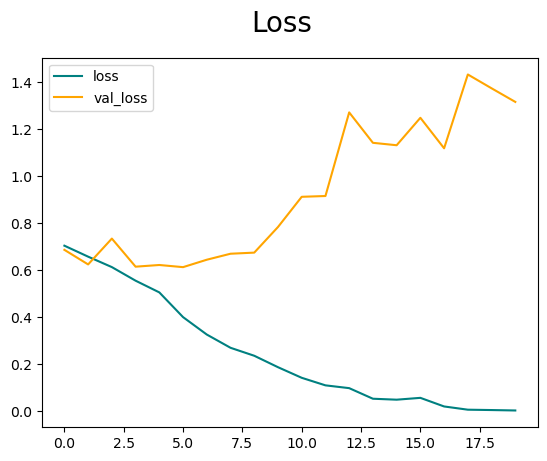

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

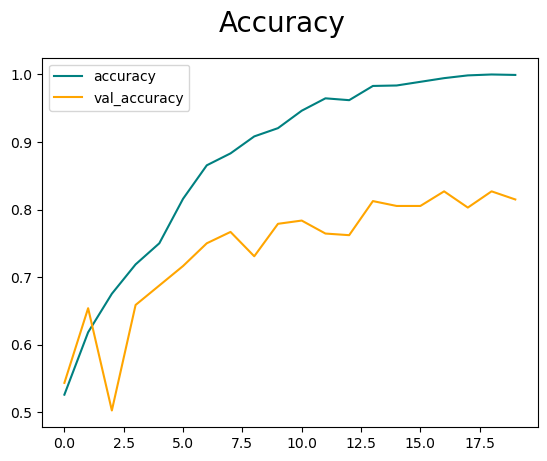

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 9. Evaluate

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:


# # Initialize the metrics
# acc = BinaryAccuracy()
# pre = Precision()
# re = Recall()

# # Loop through batches
# for batch in test.as_numpy_iterator(): 
#     X, y = batch
#     yhat = model.predict(X)
    
#     # Apply ArgMax to get predicted class labels
#     yhat_labels = (yhat > 0.5).astype(int)
    
#     # Update metrics
#     acc.update_state(y, yhat_labels)
#     pre.update_state(y, yhat_labels)
#     re.update_state(y, yhat_labels)

# # Get the results
# print(f'Accuracy: {acc.result().numpy()}')
# print(f'Precision: {pre.result().numpy()}')
# print(f'Recall: {re.result().numpy()}')
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [35]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Get predictions
# y_true = []
# y_pred = []

# for batch in test.as_numpy_iterator():
#     X, y = batch
#     y_true.extend(y)
#     yhat = model.predict(X)
#     y_pred.extend(tf.argmax(yhat, axis=-1).numpy())

# # Compute confusion matrix
# cm = confusion_matrix(y_true, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Happy", "Sad"], yticklabels=["Happy", "Sad"])
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()
print(f'Accuracy: {acc.result().numpy()}')
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')


Accuracy: 0.7604166865348816
Precision: 0.7254902124404907
Recall: 0.804347813129425


In [36]:
# yhat

## 10. Test

In [37]:
import cv2

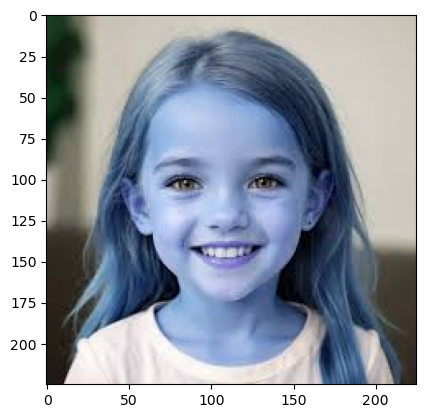

In [42]:
img = cv2.imread('happy4.jpg')
plt.imshow(img)
plt.show()

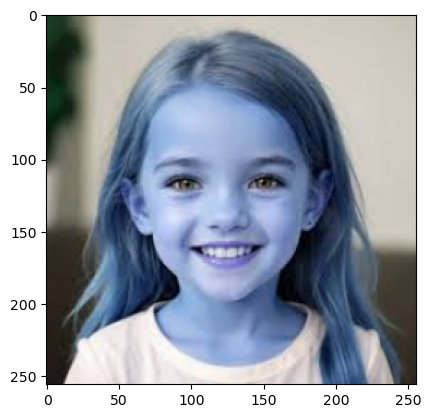

In [43]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [45]:
# Retrieve class names from directory structure
class_names = sorted(os.listdir(data_dir))
print(class_names)  # This prints the sorted list of class names (folder names)

if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')
    

    
yhat

['happy', 'sad']
Predicted class is Happy


array([[2.175705e-05]], dtype=float32)